In [0]:
import numpy as np
import matplotlib.pyplot as plt
from math import ceil,floor

In [16]:
model_root_dir = '/content/'
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets(model_root_dir+'MNIST_data', one_hot=True)

Extracting /content/MNIST_data/train-images-idx3-ubyte.gz
Extracting /content/MNIST_data/train-labels-idx1-ubyte.gz
Extracting /content/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /content/MNIST_data/t10k-labels-idx1-ubyte.gz


In [0]:
X_data = mnist.train.images
Y_data = mnist.train.labels

X_val_data = mnist.validation.images
Y_val_data = mnist.validation.labels

In [0]:
image_dims = (28,28)
input_size = 28**2
num_classes = 10
num_training_samples = mnist.train.num_examples

In [0]:
batch_size = 100
learning_rate = 0.5

epochs = 2
iterations = int(ceil(float(num_training_samples)/batch_size))

In [0]:
def forward_pass(x):
    
    x = x.reshape(-1,input_size)
  
    output = np.matmul(x,W) + b

    return(output)

In [0]:
def softmax(x):
    
    x = x - np.max(x,axis=1,keepdims=True)
    
    output = np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)

    return(output)

In [0]:
def cross_entropy(labels,logits):
    
    labels = labels.reshape(-1,num_classes)
    logits = logits.reshape(-1,num_classes)
    
    losses = -np.sum(labels*np.log(logits), axis=1)
    
    loss = np.mean(losses)
    
    return(loss)

In [0]:
def back_prop(inputs,softmax_outputs,labels):
    
    batch_size = inputs.shape[0]

    s_ce_prime = softmax_outputs - labels

    W_deltas = np.matmul(inputs.transpose(),s_ce_prime)
    b_deltas = np.sum(s_ce_prime,axis=0)
    
    W_deltas /= batch_size
    b_deltas /= batch_size
        
    global W
    W -= learning_rate*W_deltas
    global b
    b -= learning_rate*b_deltas
    

In [0]:
def calculate_accuracy(logits,labels):
    
    marking = np.equal(np.argmax(logits,axis=1),np.argmax(labels,axis=1))
    return(np.mean(marking.astype(np.int32)))

In [0]:
W = np.random.randn(input_size,num_classes)
b = np.random.randn(num_classes)

In [26]:
losses = np.array([])

for epoch in range(epochs):
    print('New epoch', str(epoch+1)+'/'+str(epochs))
    for iteration in range(iterations):
        
        X = X_data[iteration*batch_size:(iteration+1)*batch_size]
        Y = Y_data[iteration*batch_size:(iteration+1)*batch_size]
        
        nn_out = forward_pass(X)
        soft_out = softmax(nn_out)
        ce_out = cross_entropy(Y,soft_out)
        
        back_prop(X,soft_out,Y)

        if (iteration+1) % floor(iterations/5) == 0:
            
            accuracy = calculate_accuracy(forward_pass(X_val_data),Y_val_data)
            
            print('step', str(iteration+1)+'/'+str(iterations), 'loss', ce_out, 'accuracy', str(round(100*accuracy,2))+'%')

        losses = np.append(losses, ce_out)

New epoch 1/2
step 110/550 loss 1.4405036555640303 accuracy 76.5%
step 220/550 loss 0.6552076898734808 accuracy 82.06%
step 330/550 loss 0.7567349795358066 accuracy 84.14%
step 440/550 loss 0.8876804622497102 accuracy 85.32%
step 550/550 loss 0.7757847093963914 accuracy 86.26%
New epoch 2/2
step 110/550 loss 0.8200531758403868 accuracy 86.84%
step 220/550 loss 0.31480287475567037 accuracy 87.34%
step 330/550 loss 0.6366634856473479 accuracy 87.52%
step 440/550 loss 0.702845912770898 accuracy 87.54%
step 550/550 loss 0.6307129330810658 accuracy 88.2%


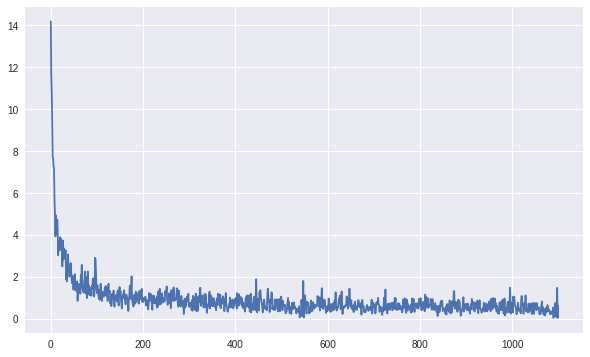

In [27]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(losses)
ax.grid(True)

In [28]:
X_test_data = mnist.test.images
Y_test_data = mnist.test.labels

accuracy = calculate_accuracy(forward_pass(X_test_data),Y_test_data)
print('accuracy:', str(round(100*accuracy,2))+'%')

accuracy: 87.75%
